In [1]:
%matplotlib widget
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy import constants as const
from matplotlib import animation as anim

In [2]:
# G = const.G.value
# M = const.M_sun.value
# c = const.c.value
# a = 0.387098 * const.au.value
# e = 0.205630
G = const.G.value
M = 4.4e6 * const.M_sun.value
c = const.c.value
a = 1020 * const.au.value
e = 0.88
rp = a * (1 + e)
rm = a * (1 - e)

In [3]:
def other(ax):
    # kepler
    a_kepler = (rp + rm) / 2
    e_kepler = rp / a_kepler - 1
    p_kepler = a_kepler * (1 - e_kepler**2)
    o_kepler = np.linspace(0, 2*np.pi, 360)
    r_kepler = p_kepler / (1 + e_kepler * np.cos(o_kepler))
    kepler, = ax.plot(o_kepler, r_kepler, 'green')
    # /kepler
    # black hole
    o_bh = np.linspace(0, 2*np.pi, 360)
    black_hole, = ax.plot(o_bh, [b]*360, 'black')
    # /black hole

def psi(r):
    return -(rm * rp)**2 / (r*(rp - r )*(r - rm)*((b*rm - rm*rp + b*rp)*r + b*rp*rm) )

def phi(r):
   return -b*c*c*(r - b)**2 *(rp - r )*(r - rm) *((b*rm - rm*rp + b*rp)*r + b*rp*rm)/(r**5*(rm - b)*(rp + rm)*(rp - b))

def orbit(r):
   return psi(r) ** 0.5

def orbit_time(r):
    return phi(r) ** -0.5

b = 2 * G * M / c / c
print(b, rm, rp)
angle = quad(orbit, rm, rp)
oto_precession = 2*(angle[0] - np.pi)
print(oto_precession)
time = 2*quad(orbit_time, rm, rp)[0]
print(angle, time, time/(365.25*24*3600))
precession = np.array([2*(angle[0] - np.pi), 2*angle[1]])*180/np.pi/time*365.25*24*3600*100
print(precession[0], precession[1])
print(115.88*24*3600)



12994300334.841099 18310779373680.0 286868876854320.0
0.0035607730548754546
(3.143373040117231, 9.463777317364475e-09) 490164206.50970423 15.532366419173329
1.3134976496332678 6.981994680054474e-06
10012032.0


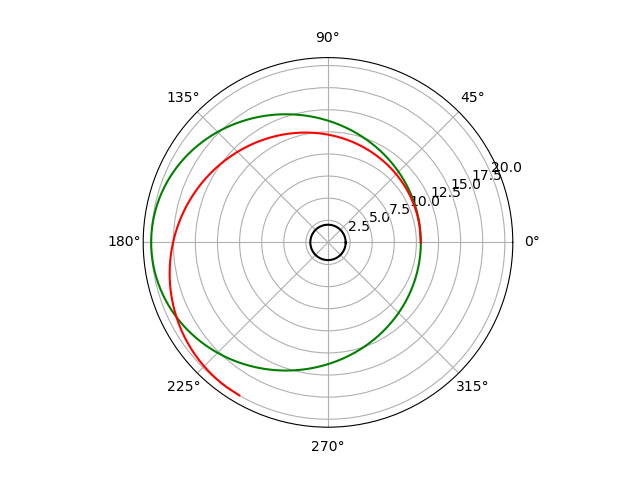

In [4]:
G = M = c = 1
b = 2 * G * M / c / c
rp = 10 * b
rm = 5.25 * b

#cE = -((rp-b)*(rm-b)*(rp+rm)/(rm*rp*(rm + rp - b)-b*(rm+rp)**2))**0.5
#J = -(b*(rm**2)*(rp**2)/(rm*rp*(rm + rp - b)-b*(rm+rp)**2))**0.5

def psi(r):
    return -(rm * rp)**2 / (r*(rp - r )*(r - rm)*((b*rm - rm*rp + b*rp)*r + b*rp*rm) )

def phi(r):
    return -b*c*c*(r - b)**2 *(rp - r )*(r - rm) *((b*rm - rm*rp + b*rp)*r + b*rp*rm)/(r**5*(rm - b)*(rp + rm)*(rp - b))

def orbit(r):
    return psi(r) ** 0.5

def orbit_time(r):
    return phi(r) ** -0.5

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

r0 = r = np.linspace(rm, rp, 500)
o0 = o = np.array([quad(orbit, rm, ri)[0] if ri != rm else 0 for ri in r])
t0 = t = np.array([quad(orbit_time, rm, ri)[0] if ri != rm else 0 for ri in r])
other(ax)
ax.plot(o, r, 'red')

# green - kepler
# red - GR

In [5]:
# alternative gravitation theory
angle = (c**2)*np.pi*(a**3)*((1-e**2)**0.5)*(1.10*10**-52)/G/M
lambd = (oto_precession/np.pi/c**2/a**3/(1-e**2)**0.5)*G*M
print(lambd)
precession = 2*(angle)*180/np.pi/time*365.25*24*3600*100
print(precession)

6.7165789358868206e-46
4.3023313755064945e-07
